In [1]:
import pdb
import os
import re
import pandas as pd
import numpy as np
import time

from numpy import mean
from numpy import dstack
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from sklearn import model_selection
from numpy import loadtxt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [6]:
def get_path_of_csv_files(top) -> list:
    """
    get all csv file path in 'top' and all its subfolers
    :param top: root dir string
    :return: ['Dataset\\N_BaIot\\Danmini_Doorbell\\benign_traffic.csv', ...] 
    """

    path_of_csv_files = []
    for path_dir_files in os.walk(top):
        for file_name in path_dir_files[2]:
            if re.search('^(?!\.)(.*?).csv',
                file_name) != None and file_name != 'demonstrate_structure.csv' and file_name != 'N_BaIot_PREPROCESSED_FULL.csv':
                path_of_csv_files.append(path_dir_files[0] + os.sep + file_name)

    return path_of_csv_files

In [7]:
temp1 = get_path_of_csv_files("Dataset")
temp1

['Dataset\\N_BaIot\\Danmii_Doorbell\\benign_traffic.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\combo.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\junk.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\scan.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\tcp.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\udp.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\mirai\\ack.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\mirai\\scan.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\mirai\\syn.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\mirai\\udp.csv',
 'Dataset\\N_BaIot\\Danmii_Doorbell\\mirai\\udpplain.csv']

In [8]:
def get_file_type(file_path: str) -> dict:
    """
    get device name and traffic type based on file path
    :param file_path: a single csv path
    :return: {'file_path': 'Dataset\\N_BaIot\\SimpleHome_XCS7_1003_WHT_Security_Camera\\mirai_attacks\\udpplain.csv',
              'device_name': 'SimpleHome_XCS7_1003_WHT_Security_Camera',
              'traffic_type': 'mirai_attacks-udpplain'}
    """

    device_name = file_path.split(os.sep)[2]
    traffic_type = ''

    if file_path.count(os.sep) == 3 and file_path.split(os.sep)[-1] == 'benign_traffic.csv':
        traffic_type = 'benign_traffic'

    if file_path.count(os.sep) == 4:
        traffic_type = file_path.split(os.sep)[3] + '-' + file_path.split(os.sep)[4].replace('.csv', '')

    return {'file_path': file_path,
            'device_name': device_name,
            'traffic_type': traffic_type}


In [9]:
for i in range(len(temp1)):
    print(get_file_type(temp1[i]))

{'file_path': 'Dataset\\N_BaIot\\Danmii_Doorbell\\benign_traffic.csv', 'device_name': 'Danmii_Doorbell', 'traffic_type': 'benign_traffic'}
{'file_path': 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\combo.csv', 'device_name': 'Danmii_Doorbell', 'traffic_type': 'gafgyt-combo'}
{'file_path': 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\junk.csv', 'device_name': 'Danmii_Doorbell', 'traffic_type': 'gafgyt-junk'}
{'file_path': 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\scan.csv', 'device_name': 'Danmii_Doorbell', 'traffic_type': 'gafgyt-scan'}
{'file_path': 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\tcp.csv', 'device_name': 'Danmii_Doorbell', 'traffic_type': 'gafgyt-tcp'}
{'file_path': 'Dataset\\N_BaIot\\Danmii_Doorbell\\gafgyt\\udp.csv', 'device_name': 'Danmii_Doorbell', 'traffic_type': 'gafgyt-udp'}
{'file_path': 'Dataset\\N_BaIot\\Danmii_Doorbell\\mirai\\ack.csv', 'device_name': 'Danmii_Doorbell', 'traffic_type': 'mirai-ack'}
{'file_path': 'Dataset\\N_BaIot\\Danmii_Doorbell\\mirai\\scan.c

In [10]:
def get_N_BaIot() -> pd.DataFrame:
    """
    :return: a dataframe
    """

    count = 1
    dataset_dir = 'Dataset' + os.sep + 'N_BaIot'
    file_list = [get_file_type(file_path) for file_path in get_path_of_csv_files(dataset_dir)]
    data = pd.DataFrame()
    for file in file_list:
        print('(loading {c}/{f})'.format(c=count, f=len(file_list)), file['file_path'])
        df_tmp = pd.read_csv(file['file_path'])
        df_tmp['device_name'] = file['device_name']
        df_tmp['traffic_type'] = file['traffic_type']
        if len(data.columns) == 0:
            data = df_tmp
        else:
            data = pd.concat([data, df_tmp])
        count += 1

    return pd.DataFrame(data)


In [11]:
temp2 = get_N_BaIot()
temp2

(loading 1/11) Dataset\N_BaIot\Danmii_Doorbell\benign_traffic.csv
(loading 2/11) Dataset\N_BaIot\Danmii_Doorbell\gafgyt\combo.csv
(loading 3/11) Dataset\N_BaIot\Danmii_Doorbell\gafgyt\junk.csv
(loading 4/11) Dataset\N_BaIot\Danmii_Doorbell\gafgyt\scan.csv
(loading 5/11) Dataset\N_BaIot\Danmii_Doorbell\gafgyt\tcp.csv
(loading 6/11) Dataset\N_BaIot\Danmii_Doorbell\gafgyt\udp.csv
(loading 7/11) Dataset\N_BaIot\Danmii_Doorbell\mirai\ack.csv
(loading 8/11) Dataset\N_BaIot\Danmii_Doorbell\mirai\scan.csv
(loading 9/11) Dataset\N_BaIot\Danmii_Doorbell\mirai\syn.csv
(loading 10/11) Dataset\N_BaIot\Danmii_Doorbell\mirai\udp.csv
(loading 11/11) Dataset\N_BaIot\Danmii_Doorbell\mirai\udpplain.csv


,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,device_name,traffic_type
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,Danmii_Doorbell,benign_traffic
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,5.319895,344.262695,4.710446,344.262695,2.218830e+01,0.0,0.0,Danmii_Doorbell,benign_traffic
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,6.318264,347.703087,9.034660,347.703087,8.162508e+01,0.0,0.0,Danmii_Doorbell,benign_traffic
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,1.000000,337.000000,0.000000,337.000000,0.000000e+00,0.0,0.0,Danmii_Doorbell,benign_traffic
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000e+00,0.0,0.0,Danmii_Doorbell,benign_traffic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81977,105.769355,351.445104,59033.632714,179.698484,332.392768,60364.207322,519.025485,327.978538,60568.830128,5025.952792,...,0.0,23441.691874,554.000000,0.000031,554.000000,9.313226e-10,0.0,0.0,Danmii_Doorbell,mirai-udpplain
81978,106.767520,353.342263,58861.394701,180.696613,333.619173,60300.419617,520.023684,328.413174,60550.405264,5026.951047,...,0.0,23442.691060,554.000000,0.000031,554.000000,9.313226e-10,0.0,0.0,Danmii_Doorbell,mirai-udpplain
81979,107.341380,355.211604,58684.641197,181.263540,334.834977,60234.214077,520.607907,328.846489,60531.660371,5027.548981,...,0.0,23443.503554,554.000000,0.000032,554.000000,1.047738e-09,0.0,0.0,Danmii_Doorbell,mirai-udpplain
81980,107.626489,357.058626,58503.134010,181.538246,336.042243,60165.548121,520.912605,329.278718,60512.588315,5027.877118,...,0.0,23444.190245,554.000000,0.000030,554.000000,8.731149e-10,0.0,0.0,Danmii_Doorbell,mirai-udpplain


In [12]:
temp3 = temp2['traffic_type'].unique()
temp3

array(['benign_traffic', 'gafgyt-combo', 'gafgyt-junk', 'gafgyt-scan',
       'gafgyt-tcp', 'gafgyt-udp', 'mirai-ack', 'mirai-scan', 'mirai-syn',
       'mirai-udp', 'mirai-udpplain'], dtype=object)

In [13]:
# generate new dataset for CNN includ benign traffic and specific attack type from temp3 excluding benigh traffic
def X_Y_to_CSV(attack_name, device_name):
    temp2_new = temp2.drop(columns=['device_name'])
    df = temp2_new[(temp2_new['traffic_type'] == 'benign_traffic') | (temp2_new['traffic_type'] == attack_name)]
    label = df['traffic_type']
    df = df.drop(columns=['traffic_type'])
    
    # write X into csv
    df.to_csv("Dataset\\N_BaIot\\" + device_name + "\\CNN_Dataset\\X_" + attack_name + ".csv", index=None, header = None)
    label = pd.DataFrame(label)
    # write label into csv
    for index, row in label.iterrows():
        if row['traffic_type'] == 'benign_traffic':
            row['traffic_type'] = 0
        else:
            row['traffic_type'] = 1
    label.to_csv("Dataset\\N_BaIot\\" + device_name + "\\CNN_Dataset\\Y_" + attack_name + ".csv", index=None, header = None)

In [14]:
# generate new dataset for gafgyt-combo attack
X_Y_to_CSV(temp3[1], "Danmii_Doorbell")

In [15]:
def Load(attack_name, split=0.2, seed=760):
    
    print("Loading data ...")
    dataX = loadtxt('Dataset/N_BaIot/Danmii_Doorbell/CNN_Dataset/X_' + attack_name + '.csv', delimiter=',')
    dataY = loadtxt('Dataset/N_BaIot/Danmii_Doorbell/CNN_Dataset/Y_' + attack_name + '.csv', delimiter=',')
        
    # split data into training and test set
    print("Spliting data ...")
    trainX, testX = train_test_split(dataX, test_size=split, random_state=seed, shuffle=True)
    trainY, testY = train_test_split(dataY, test_size=split, random_state=seed, shuffle=True)

    # dstack for training and test set
    list_train = list()
    list_test = list()
    list_train.append(trainX)
    list_test.append(testX)
    
    print("Stacking data ...")
    trainX = dstack(list_train)
    testX = dstack(list_test)

    print("Category data ...")
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    print('trainX.shape: ', trainX.shape)
    print('testX.shape: ', testX.shape)
    print('trainy.shape: ', trainY.shape)
    print('testy.shape: ', testY.shape, '\n')
    
    return trainX, trainY, testX, testY

In [16]:
trainX, trainY, testX, testY = Load("gafgyt-combo")

Loading data ...
Spliting data ...
Stacking data ...
Category data ...
trainX.shape:  (87412, 115, 1)
testX.shape:  (21854, 115, 1)
trainy.shape:  (87412, 2)
testy.shape:  (21854, 2) 



In [50]:
# define the epochs and batch_size
epochs, batch_size = 10, 64

def CNN_Model(trainX, trainY, testX, testY):

    n_features, n_added_dimension, n_outputs = trainX.shape[1], trainX.shape[2], trainY.shape[1]

    model = Sequential()
    
    # First Conv Layer
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(n_features, n_added_dimension)))
    
    # Second Conv Layer
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    
    # Maxpooling Layer
    model.add(MaxPooling1D(pool_size=2))
    
    # Third Conv Layer
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    
    # Maxpooling Layer
    model.add(MaxPooling1D(pool_size=2))

    # flatten layer
    model.add(Flatten())

    # first dense layer
    model.add(Dense(50, activation='relu'))

    # second dense layer
    model.add(Dense(n_outputs, activation='softmax'))
    
    # summary model
    model.summary()
    
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # fit model
    cnn = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

    # evaluate
    score = model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
    
    y_pred = model.predict(testX)
    yy_true = [np.argmax(i) for i in testY]
    yy_scores = [np.argmax(i) for i in y_pred]
    
    return score, cnn, y_pred, yy_true, yy_scores

In [51]:
score, cnn, y_pred, yy_true, yy_scores = CNN_Model(trainX, trainY, testX, testY)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 113, 32)           128       
                                                                 
 conv1d_10 (Conv1D)          (None, 111, 64)           6208      
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 55, 64)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 53, 128)           24704     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 26, 128)          0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3328)             

In [52]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print("Recall: " + str(recall_score(yy_true, yy_scores, average='weighted')))
print("Precision: " + str(precision_score(yy_true, yy_scores, average='weighted')))
print("F1 Score: " + str(f1_score(yy_true, yy_scores, average='weighted')))


Recall: 0.9397821909032671
Precision: 0.9458209500872419
F1 Score: 0.9392614813354602


In [53]:
score

[0.19562427699565887, 0.9397822022438049]

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [55]:
# ROC Curve
n_classes = 2
lw = 2
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(yy_true))[:, i], np.array(pd.get_dummies(yy_scores))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [56]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(np.array(pd.get_dummies(yy_true))[:, i], np.array(pd.get_dummies(yy_scores))[:, i])
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [57]:
from scipy import interp
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

In [58]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

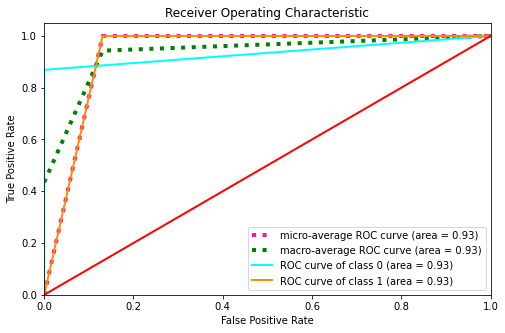

In [59]:
# Plot all ROC curves
from itertools import cycle
import matplotlib.pylab as plt
plt.figure(figsize=(8,5))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1],color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.savefig('Plots/ROCcurveFinal.png')
plt.show()


In [223]:
def Experiment(repeats, attack_name, split=0.2, seed=760):
    
    experiment_start_time = time.time()

    trainX, trainY, testX, testY = Load(attack_name, split=split, seed = seed)
    
    print('Training for ' + attack_name + '...\n')
    
    # repeat experiment
    training_start_time = time.time()
    
    scores = list()
    losses = list()
    
    for r in range(repeats):
        print('Repeat: ', r+1)
        
        loss, score = CNN_Model(trainX, trainY, testX, testY)
    
        loss = loss
        score = score * 100.0
        
        print('Loss: %.5f' %loss, '\n')
        print('Score: %.2f%%' %score, '\n')
    
        losses.append(loss)
        scores.append(score)
    
    # results
    print('Results for ' + attack_name + ':')
    print('Accuracy: %.2f%%' %(mean(scores)))
    print('Hinge Loss: %.2f' %(mean(losses)))
    
    print("Duration of training model: %d seconds" %(time.time() - training_start_time))
    print("Duration of experiment: %d seconds" %(time.time() - experiment_start_time))

In [ ]:
Experiment(1, "gafgyt-combo", split=0.2, seed=760)